# Project 1, Part 1
Name: Thomas Greenacre
Date: 6/5/2022

---



In [140]:
# mount google drive where data file lives
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
# import pandas library
import pandas as pd

# read in file and show summary (first 5 rows) to validate the file was read in
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 2/sales_predictions (1).csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [142]:
# use the .shape function to get the number of rows and columns
df.shape

(8523, 12)

In [143]:
# use the .info function to understand the data type (Dtype) of each field 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [144]:
# identify any duplicate rows with a True or False
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [145]:
# show any rows that are duplicated
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [146]:
# drop any duplicate rows, as we know from above there are no dups in the data set already
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [147]:
# identify the number of cells missing data for each field
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [148]:
# inspect the Item_Weight field to gain understandng around missing data
df[['Item_Weight']].describe()

,Item_Weight
count,7060.000000
mean,12.857645
std,4.643456
min,4.555000
25%,8.773750
50%,12.600000
75%,16.850000
max,21.350000


In [149]:
# inspect the Outlet_Size field to gain understandng around missing data
df[['Outlet_Size']].describe()

,Outlet_Size
count,6113
unique,3
top,Medium
freq,2793


In [150]:
# after inspecting and finding both fields (Item_Weight and Outlet_Size) have a large % of missing values (~17%,  ~28%), I decided to drop both fields. 
# Had the % of missing cells been much lower (<5%), I would have used a different method such as taking the mean, median, or mode to fill missing cells for Itme_Weight feid
df = df.drop(columns=['Item_Weight', 'Outlet_Size'])
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [151]:
# validating that there is no missing values for any remaining fields
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [152]:
# use the nunique function to see how many unique values their are for each field; this is helpful esecially when inspecting categprical data
df.nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [153]:
# begin inspecing specific fields (Item_Type) to see if there is "dirty" data that needs to be cleaned up
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [154]:
# inspect the cleanliness of the 'Outlet_Identifier' field 
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [155]:
# inspect the cleanliness of the 'Item_Fat_Content' field 
# as you can see there is some "dirty" data that needs to be cleaned up
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [156]:
# cleanup the 'Item_Fat_Content' field by replacing incorrect values with correct values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

# use the value_counts function again to validate 
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [157]:
# inspect another categorical field 'Outlet_Location_Type' for data cleanliness; no issues
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [158]:
# inspect another categorical field 'Outlet_Location_Type' for data cleanliness; no issues
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [159]:
df[['Item_Identifier', 'Item_Visibility']].describe()

,Item_Visibility
count,8523.000000
mean,0.066132
std,0.051598
min,0.000000
25%,0.026989
50%,0.053931
75%,0.094585
max,0.328391


In [160]:
# use the describe function to show stats for each numerical (float or int) field
df[["Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]].describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


# Project 1, Part 3: Histograms, Boxplots, Correlation & HeatMaps
Name: Thomas Greenacre
Date: 6/5/2022

---

In [161]:
# readin orignal data set
df_2 = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 2/sales_predictions (1).csv')
df_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [163]:
# use .corr() function to performance correlation analysis between multiple variables (fields)
corr = df_2.corr()

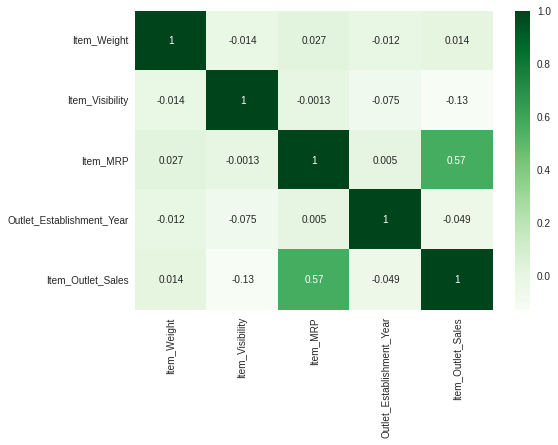

In [164]:
# use seaborn library to visualize the correlation analaysis 
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens', annot = True);
# Top Positive Correlation(s): Item_MRP & Item_Outlet_Sales (0.57)
# Top Negative Correlation(s): Item_Outlet_Sales & Outlet_Establishment_Year (-0.049)
# Key Takeawat: the only variables that seem to have a strong relationship between each other is Item_MRP & Item_Outlet_Sales. All other relationships are close to 0.0, indicating low correlation between the 2 varibales

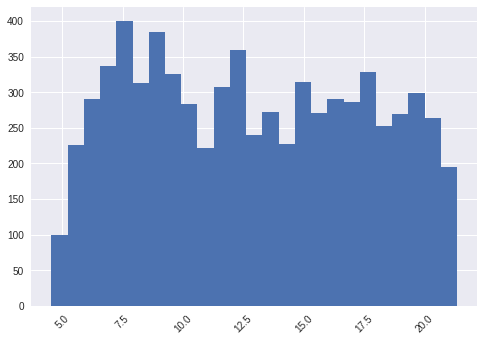

In [165]:
# create hsitogram to undstand distribution of 'Item_Weight' field
df_2['Item_Weight'].hist(bins = 25)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
# takeaway: little variance in distribution of 'Item_Weight'; the number of items with a smaller item weight is similar to the number of items with a greater item wieght

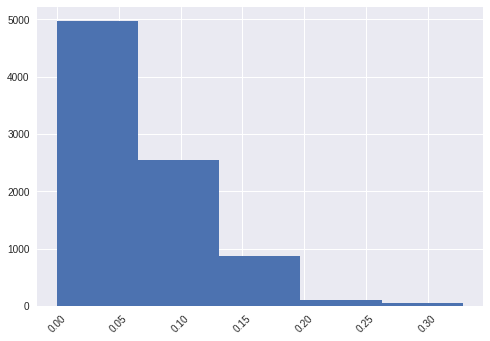

In [166]:
# create hsitogram to undstand distribution of 'Item_Visibility' field
df_2['Item_Visibility'].hist(bins = 5)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
# takeaway: most items have an item visibility between 0.00 and 0.125; after 0.125 there are only a few items with greater visibility and 0 items with less than 0.00 visibiliy

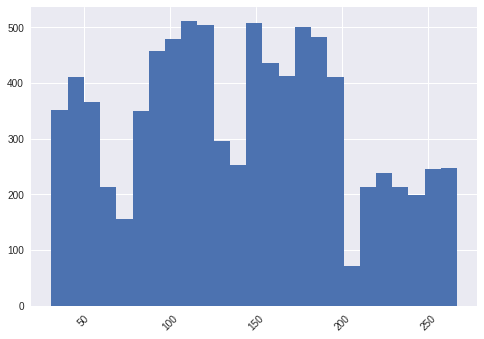

In [167]:
# create hsitogram to undstand distribution of 'Item_MRP' field
df_2['Item_MRP'].hist(bins = 25)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
# takeway: most items are have an MRP of vetween 75 and 200. There are a few items with less than 75 MRP and few items with greater than 200 MR P

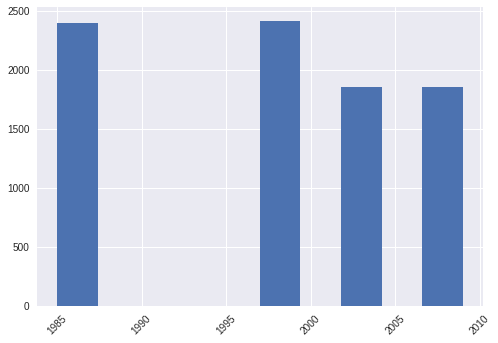

In [168]:
# create hsitogram to undstand distribution of 'Outlet_Establishment_Year' field
df_2['Outlet_Establishment_Year'].hist(bins = 10)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
# takeaway: most items have an estavlihs year between ~1997 and ~2009; there is an outlier where a number of items have an estalblishment year between ~1985 and ~1987

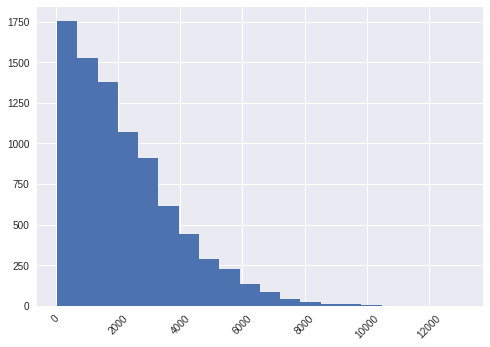

In [169]:
# create hsitogram to undstand distribution of 'Item_Outlet_Sales' field
df_2['Item_Outlet_Sales'].hist(bins = 20)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
#takeaway: most items have few outlet sales, as expected there are few items bring in more outlet sales then others

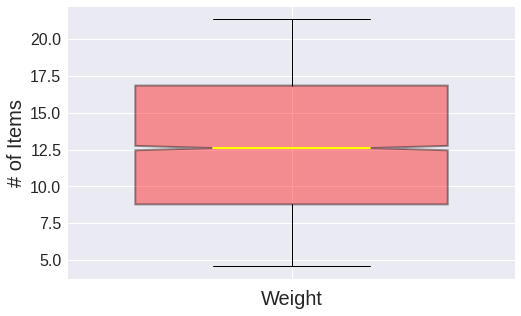

In [170]:
# create a boxplot to better understand the distribution for the 'Item_weight' field
Weight = df_2.loc[df_2['Item_Weight'] >= 0,'Item_Weight']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([Weight],
           notch = True,
           labels=[''],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Weight', fontsize = 20);
plt.ylabel('# of Items', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
#takeaway: the mean weight is 12.5 and the majority of items have a weight between ~8 and ~17. 

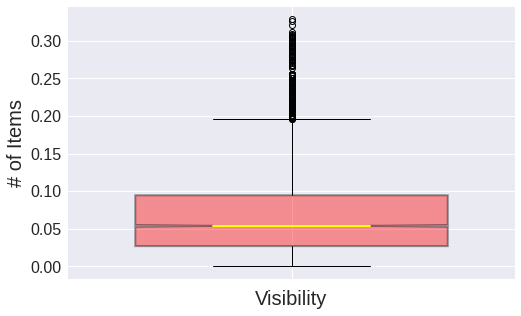

In [171]:
# create a boxplot to better understand the distribution for the 'Item_Visibility' field
Visibility = df_2.loc[df_2['Item_Visibility'] >= 0,'Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([Visibility],
           notch = True,
           labels=[''],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Visibility', fontsize = 20);
plt.ylabel('# of Items', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
#takeaway: the mean visibility is 0.05 with the majority of items having a visibility range from ~0.025 to ~0.10. There are some outliers, most of which are of higher (greater than 0.10) visibility

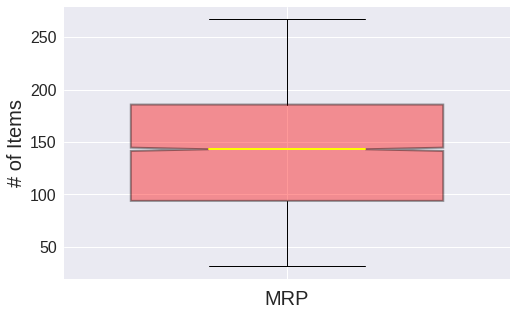

In [172]:
# create a boxplot to better understand the distribution for the 'Item_MRP' field
MRP = df_2.loc[df_2['Item_MRP'] >= 0,'Item_MRP']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([MRP],
           notch = True,
           labels=[''],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('MRP', fontsize = 20);
plt.ylabel('# of Items', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
#takeaway: the average (mean) MRP is ~147 with most items having a MRP between ~97 and ~190. The highest MRP is ~265